# QuTiP example: Groundstate of an ultra-strong coupled atom-cavity system

J.R. Johansson and P.D. Nation

For more information about QuTiP see [http://qutip.org](http://qutip.org)

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

In [4]:
from qutip import *
import time
from mpl_toolkits.mplot3d import Axes3D

In [5]:
def compute(N, wc, wa, glist, use_rwa):

    # Pre-compute operators for the hamiltonian
    a  = tensor(destroy(N), qeye(2))
    sm = tensor(qeye(N), destroy(2))
    nc = a.dag() * a
    na = sm.dag() * sm
        
    idx = 0
    na_expt = np.zeros(shape(glist))
    nc_expt = np.zeros(shape(glist))
    for g in glist:

        # recalculate the hamiltonian for each value of g
        if use_rwa: 
            H = wc * nc + wa * na + g * (a.dag() * sm + a * sm.dag())
        else:
            H = wc * nc + wa * na + g * (a.dag() + a) * (sm + sm.dag())

        # find the groundstate of the composite system
        evals, ekets = H.eigenstates()
        psi_gnd = ekets[0]
        na_expt[idx] = expect(na, psi_gnd)
        nc_expt[idx] = expect(nc, psi_gnd)

        idx += 1

    return nc_expt, na_expt, ket2dm(psi_gnd)
    
#
# set up the calculation
#
wc = 1.0 * 2 * np.pi   # cavity frequency
wa = 1.0 * 2 * np.pi   # atom frequency
N = 20              # number of cavity fock states
use_rwa = False     # Set to True to see that non-RWA is necessary in this regime

glist = np.linspace(0, 2.5, 50) * 2 * np.pi # coupling strength vector

start_time = time.time()
nc, na, rhoss_final = compute(N, wc, wa, glist, use_rwa)
print('time elapsed = ' + str(time.time() - start_time)) 

time elapsed = 3.02514386177063


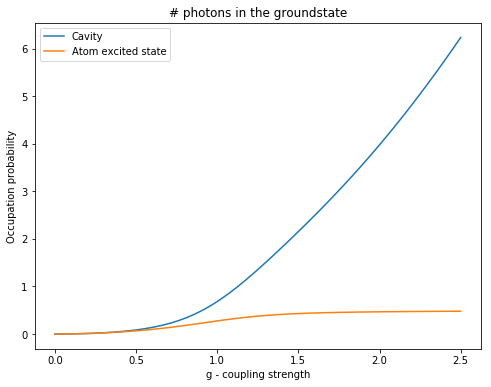

In [9]:
#
# plot the cavity and atom occupation numbers as a function of g
#
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(glist/(2*np.pi), nc)
ax.plot(glist/(2*np.pi), na)
ax.legend(("Cavity", "Atom excited state"))
ax.set_xlabel('g - coupling strength')
ax.set_ylabel('Occupation probability')
ax.set_title('# photons in the groundstate');

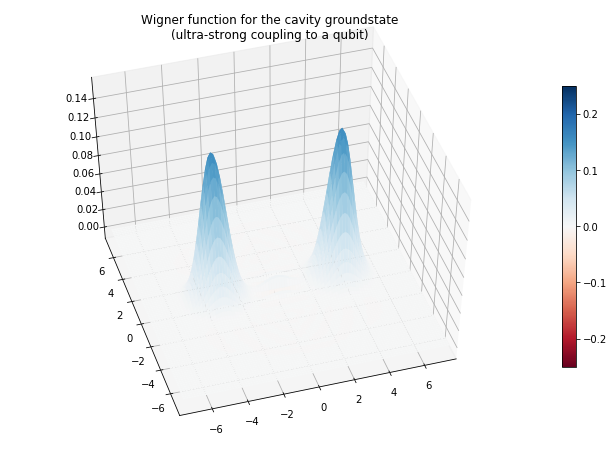

In [7]:
#
# plot the cavity wigner function for the cavity state (final coupling strenght)
#
fig = plt.figure(2, figsize=(9, 6))
rho_cavity = ptrace(rhoss_final, 0)
xvec = np.linspace(-7.5,7.5,100)
X,Y = np.meshgrid(xvec, xvec)
W = wigner(rho_cavity, xvec, xvec)
ax = Axes3D(fig, azim=-107, elev=49)
surf=ax.plot_surface(X, Y, W, rstride=1, cstride=1, cmap=plt.cm.RdBu, alpha=1.0, linewidth=0.05, 
                     vmax=0.25, vmin=-0.25)
ax.set_xlim3d(-7.5, 7.5)
ax.set_ylim3d(-7.5, 7.5)
fig.colorbar(surf, shrink=0.65, aspect=20)
ax.set_title("Wigner function for the cavity groundstate\n(ultra-strong coupling to a qubit)");

## Software version:

In [8]:
from qutip.ipynbtools import version_table

version_table()

Software,Version
QuTiP,4.3.1
Numpy,1.14.3
SciPy,1.0.1
matplotlib,2.1.2
Cython,0.27.3
Number of CPUs,2
BLAS Info,OPENBLAS
IPython,6.2.1
Python,"3.6.4 |Anaconda custom (64-bit)| (default, Jan 16 2018, 18:10:19) [GCC 7.2.0]"
OS,posix [linux]
